## Kymograph Cluster Code

should I add a retry call by default?

In [3]:
import trenchripper as tr

#### Start Dask

In [2]:
# kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='2GB')
kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [3]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.170:53884 Dashboard: http://10.120.16.170:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


#### Perform Extraction

In [16]:
hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/full_pipeline_test/40x_Ph2_Test_1.5.nd2","/n/scratch2/de64/full_pipeline_test") ##find a more elegent way to do grids....

/home/de64/anaconda3/lib/python3.7/site-packages/nd2reader/common_raw_metadata.py:94: RuntimeWarning: Reported average frame interval (239968.2 ms) doesn't match the set interval (240000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


In [5]:
fov_list = list(range(0,80))

In [8]:
hdf5_extractor.writemetadata()

/home/de64/anaconda3/lib/python3.7/site-packages/tables/path.py:118: NaturalNameWarning: object name is a Python keyword: 'global'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  % (name, _warnInfo), NaturalNameWarning)


In [6]:
kymo_controller.mapfovs(hdf5_extractor.extract_fov,fov_list)

In [ ]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

In [17]:
# hdf5_extractor.writemetadata()
hdf5_extractor.extract_fov(57)

In [4]:
# test = tr.utils.pandas_hdf5_handler("/n/scratch2/de64/full_pipeline_test/metadata.hdf5")

#### End Dask, Cancel Jobs

In [7]:
kymo_controller.shutdown()

In [ ]:
#scancel --name=dask-worker --user=de64

#### Generate Kymographs

#### Start Dask

In [7]:
kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [8]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.170:47838 Dashboard: http://10.120.16.170:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [9]:
# input_file_prefix = '/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_'
# output_path = '/n/scratch2/de64/for_sylvia/timelapse/kymo'
# all_channels = ["channel_Phase"]

# kymo = tr.kymograph.kychunker(input_file_prefix=input_file_prefix,output_path=output_path,all_channels=all_channels,trench_len_y=110,padding_y=20,trench_width_x=20,\
#                  t_chunk=25,t_range=(0,400),y_percentile=90,y_min_edge_dist=50,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.2,\
#                  top_orientation=0,x_percentile=85,background_kernel_x=(301,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.7)

# input_file_prefix = "/n/scratch2/de64/full_pipeline_test/hdf5/fov_"
# output_path = '/n/scratch2/de64/full_pipeline_test/kymo'
# all_channels = ["channel_BF","channel_RFP"]

# kymo = tr.kymograph.kychunker(input_file_prefix=input_file_prefix,output_path=output_path,all_channels=all_channels,trench_len_y=110,padding_y=20,trench_width_x=20,\
#                  t_chunk=25,t_range=(0,-1),y_percentile=90,y_min_edge_dist=50,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.2,\
#                  orientation_detection='phase',x_percentile=85,background_kernel_x=(301,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.7)


headpath = "/n/scratch2/de64/full_pipeline_test"
all_channels = ["channel_RFP","channel_BF"]

kymo = tr.kymograph.kychunker(headpath=headpath,all_channels=all_channels,trench_len_y=270,padding_y=40,trench_width_x=30,\
                 t_chunk=25,t_range=(0,-1),y_percentile=90,y_min_edge_dist=50,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.60,\
                 expected_num_rows=2,orientation_detection=0,x_percentile=95,background_kernel_x=(21,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.7)

In [10]:
# fov_list = list(range(15)) + list(range(67,80))
# fov_list = list(range(20)) + list(range(60,80))
fov_list = list(range(0,80))

In [11]:
kymo_controller.mapfovs(kymo.generate_kymograph,fov_list,retries=1)

In [13]:
kymo_controller.retry_failed()

Worker tcp://10.120.17.88:54991 restart in Job 40670953. This can be due to memory issue.
Worker tcp://10.120.16.124:50044 restart in Job 40670933. This can be due to memory issue.
Worker tcp://10.120.17.105:53339 restart in Job 40670962. This can be due to memory issue.
Worker tcp://10.120.16.127:49094 restart in Job 40670959. This can be due to memory issue.
Worker tcp://10.120.17.110:60847 restart in Job 40670963. This can be due to memory issue.
Worker tcp://10.120.17.110:47487 restart in Job 40670938. This can be due to memory issue.
Worker tcp://10.120.16.106:41151 restart in Job 40670956. This can be due to memory issue.
Worker tcp://10.120.16.107:35828 restart in Job 40670944. This can be due to memory issue.
Worker tcp://10.120.17.127:48477 restart in Job 40670954. This can be due to memory issue.
Worker tcp://10.120.16.101:34205 restart in Job 40670967. This can be due to memory issue.
Worker tcp://10.120.16.133:44244 restart in Job 40670934. This can be due to memory issue.


In [14]:
kymo.collect_metadata(fov_list,use_archive=False,overwrite_archive=True)

fovs processed: 78/80
lanes processed: 135
trenches processed: 7452
lanes/fov: 1.7307692307692308
trenches/fov: 95.53846153846153
failed fovs: [57, 77]


In [19]:
kymo.collect_metadata(fov_list,use_archive=True,overwrite_archive=False)

fovs processed: 79/80
lanes processed: 136
trenches processed: 7507
lanes/fov: 1.7215189873417722
trenches/fov: 95.0253164556962
failed fovs: [77]


maybe an estimate of memory usage

In [18]:
kymo.generate_kymograph(57)

/home/de64/TrenchRipper/trenchripper/utils.py:300: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [1]:
import h5py
from matplotlib import pyplot as plt

In [8]:
# for fov in fov_list:
for fov in [12,63]:
    print(fov)
    with h5py.File("/n/scratch2/de64/full_pipeline_test/hdf5/fov_"+str(fov)+".hdf5") as testfile:
        data = testfile['channel_RFP']
        arr = data[:,:,0]

12
63


In [7]:
arr.shape

(2048,)

In [1]:
import pandas as pd

In [6]:
meta_handle = tr.utils.pandas_hdf5_handler("/n/scratch2/de64/full_pipeline_test/metadata.hdf5")
kymo_meta = meta_handle.read_df("kymo")

In [10]:
kymo_meta[kymo_meta["fov"]==5]

,fov,lane,trench,timepoints,time (s),lane orientation,y (local),x (local),y (global),x (global)
0,5,0,0,0,8.705783,bottom,179.151263,3.684902,-2826.448737,4673.084902
1,5,0,0,1,247.945007,bottom,178.609366,4.010040,-2826.990634,4673.410040
2,5,0,0,2,487.845095,bottom,178.609366,4.118420,-2827.090634,4673.518420
3,5,0,0,3,727.915919,bottom,178.717745,4.226799,-2826.882255,4673.626799
4,5,0,0,4,967.885631,bottom,178.826125,4.226799,-2826.873875,4673.626799
5,5,0,0,5,1207.842839,bottom,178.934504,4.335179,-2826.765496,4673.735179
6,5,0,0,6,1447.847807,bottom,178.934504,4.443558,-2826.765496,4673.843558
7,5,0,0,7,1687.838375,bottom,178.717745,4.443558,-2826.982255,4673.843558
8,5,0,0,8,1927.856087,bottom,178.609366,4.335179,-2827.090634,4673.635179
9,5,0,0,9,2167.928783,bottom,178.717745,4.335179,-2826.682255,4673.635179


In [11]:
import h5py
from matplotlib import pyplot as plt
h5py_handle = h5py.File("/n/scratch2/de64/full_pipeline_test/kymo/kymo_5.hdf5","r")

In [12]:
data = h5py_handle['0/channel_RFP']

In [13]:
data.shape

(55, 310, 30, 25)

In [14]:
data.chunks

(1, 310, 30, 1)

In [15]:
arr = data[:,:,0]

In [17]:
h5py_handle.close()

In [ ]:
print("moo")

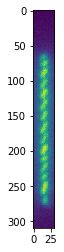

In [32]:
plt.imshow(h5py_handle["0/channel_RFP"][0,:,:,0])

In [51]:
h5py_handle["0/channel_RFP"].chunks

(1, 310, 30, 1)

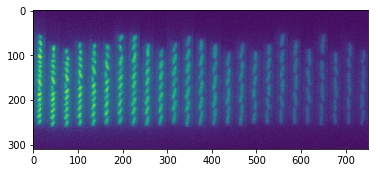

In [16]:
kymo_handle = tr.utils.kymo_handle()
kymo_handle.import_wrap(h5py_handle["0/channel_RFP"][39])
plt.imshow(kymo_handle.return_unwrap())

#### Generate Segmentation

#### Start Dask

In [24]:
kymo_controller = tr.cluster.dask_controller(walltime='01:00:00',local=False,n_workers=80,memory='1GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

/home/de64/anaconda3/lib/python3.7/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


In [34]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.161:41877 Dashboard: http://10.120.16.161:42759/status,Cluster Workers: 30 Cores: 30 Memory: 30.00 GB


In [56]:
kymo_controller.daskclient.restart()

Worker tcp://10.120.16.106:33149 restart in Job 40670956. This can be due to memory issue.
Worker tcp://10.120.16.45:44835 restart in Job 40670966. This can be due to memory issue.
Worker tcp://10.120.16.101:55006 restart in Job 40670967. This can be due to memory issue.
Worker tcp://10.120.16.68:32904 restart in Job 40670941. This can be due to memory issue.
Worker tcp://10.120.16.120:35591 restart in Job 40670932. This can be due to memory issue.
Worker tcp://10.120.17.91:50342 restart in Job 40670937. This can be due to memory issue.
Worker tcp://10.120.17.80:36472 restart in Job 40670961. This can be due to memory issue.
Worker tcp://10.120.16.44:59274 restart in Job 40670965. This can be due to memory issue.
Worker tcp://10.120.17.71:40797 restart in Job 40670950. This can be due to memory issue.
Worker tcp://10.120.17.71:58611 restart in Job 40670949. This can be due to memory issue.
Worker tcp://10.120.17.134:46546 restart in Job 40670955. This can be due to memory issue.
Worker

Client Scheduler: tcp://10.120.16.170:47838 Dashboard: http://10.120.16.170:8787/status,Cluster Workers: 41 Cores: 41 Memory: 164.00 GB


In [57]:
segment = tr.segment.fluo_segmentation_cluster("/n/scratch2/de64/full_pipeline_test","channel_RFP",smooth_sigma=0.75,wrap_pad=3,hess_pad=4,min_obj_size=30,cell_mask_method='local',\
                 cell_otsu_scaling=1.,local_otsu_r=15,edge_threshold_scaling=1.,threshold_range=20,threshold_step=10,convex_threshold=0.8)

In [58]:
fov_list = list(set(range(0,80))-set([77]))

In [59]:
kymo_controller.mapfovs(segment.generate_segmentation,fov_list)

#### End Dask, Cancel Jobs

In [15]:
kymo_controller.shutdown()

In [4]:
import h5py
from matplotlib import pyplot as plt

In [5]:
data = h5py.File("/n/scratch2/de64/full_pipeline_test/segmentation/seg_0.hdf5")

In [6]:
kymo_handle = tr.utils.kymo_handle()

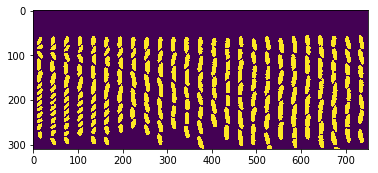

In [7]:
kymo_handle.import_wrap(data['0'][30])
plt.imshow(kymo_handle.return_unwrap())

### NOTE

- **How to deal with some fovs having a different number of rows than other fovs??? Try to make more flexible...**

maybe add a kymograph viewer here

### Note
There may be an issue where hdf5 files do not close properly on crashes...

In [7]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

#### End Dask, Cancel Jobs

In [14]:
kymo_controller.shutdown()

In [ ]:
#scancel --name=dask-worker --user=de64

#### Note: access request to the transfer partition pending; automate this bit later

In [10]:
import subprocess

in_path = "/n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/test"
out_path = "/n/scratch2/de64/for_sylvia/"
wrap_str = "rsync " + in_path + " " + out_path
cmd_str = 'sbatch -p transfer -t 0-12:00 --wrap="' + wrap_str + '"'

subprocess.check_output(cmd_str,
                shell=True)

CalledProcessError: Command 'sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/test /n/scratch2/de64/for_sylvia/"' returned non-zero exit status 1.

In [6]:
cmd_str

'sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/2019-02-08_bacillus_mbm_top_s750_bottom /n/scratch2/de64/for_sylvia/"'

In [11]:
!sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON\LAB/Daniel/Image_Data/Bacillus_Project/test /n/scratch2/de64/for_sylvia/"

sbatch: error: Batch job submission failed: User's group not permitted to use this partition


#### Note: need to find a way to associate lanes from init barcoding snapshot with imaging lanes

plan:
- extract and segment (with phase) barcoding file
- extract and segment experiemnt file
- for both, note x positions of t=0 trenches
- compare these values to map trenches to eachother...

In [11]:
import h5py
from matplotlib import pyplot as plt
import numpy as np

In [12]:
np.array([1,2])[:]

array([1, 2])

In [22]:
h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/kymo/kymo_10.hdf5","r")

In [23]:
list(h5py_handle.keys())

['0', '1']

In [28]:
top = h5py_handle["1/channel_Phase"]

In [29]:
# top = h5py_handle["channel_Phase"]

In [30]:
top

<HDF5 dataset "channel_Phase": shape (83, 130, 20, 400), type "<u2">

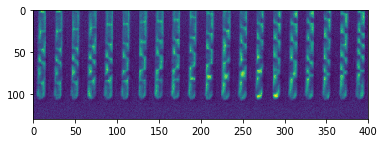

In [31]:
# plt.imshow(top[50,:,:,20])
tr.tplot.plot_kymograph(top[10,:,:,0:20])

In [25]:
def test_fn():
    h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r");
    top = h5py_handle["channel_Phase"];
    test = top[:,:,0:50];
    output2 = np.percentile(test,85,axis=1,interpolation='lower');
    output3 = np.percentile(test,85,axis=1,interpolation='higher');
    output4 = np.percentile(test,85,axis=1,interpolation='linear');
    h5py_handle.close()

In [26]:
%load_ext line_profiler
%lprun -f test_fn test_fn()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-06 s

Total time: 39.6359 s
File: <ipython-input-25-1a56ceeb7df0>
Function: test_fn at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def test_fn():
     2         1       3147.0   3147.0      0.0      h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r");
     3         1        481.0    481.0      0.0      top = h5py_handle["channel_Phase"];
     4         1   20586913.0 20586913.0     51.9      test = top[:,:,0:50];
     5         1    5080581.0 5080581.0     12.8      output2 = np.percentile(test,85,axis=1,interpolation='lower');
     6         1    5942326.0 5942326.0     15.0      output3 = np.percentile(test,85,axis=1,interpolation='higher');
     7         1    8021980.0 8021980.0     20.2      output4 = np.percentile(test,85,axis=1,interpolation='linear');
     8         1        447.0    447.0      0.0      h5py_handle.close()

AttributeError: 'Dataset' object has no attribute 'index'

In [21]:
h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r");
top = h5py_handle["channel_Phase"];
slc = [slice(None)] * len(top.shape)
slc[2] = slice(0, 50)
print(slc)
test = top[tuple(slc)];
h5py_handle.close()

[slice(None, None, None), slice(None, None, None), slice(0, 50, None)]


In [22]:
h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r");
top = h5py_handle["channel_Phase"];
test = top[:,:,range(0,50)];
h5py_handle.close()

In [73]:
h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r");
top = h5py_handle["channel_Phase"];
test = top[:,:,list(range(0,50))];
h5py_handle.close()

In [ ]:
h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r");
top = h5py_handle["channel_Phase"];
test = np.take(top, list(range(0,50)), axis=2)
h5py_handle.close()

In [ ]:
np.take(h5py_handle["channel_Phase"], [1,2,3,4,5], axis=2) ##this operation is killing me

In [9]:
h5py_handle["channel_Phase"][:,:,:20].shape

(2048, 2048, 20)

In [4]:
h5py_handle.close()

In [8]:
h5py_handle["1/channel_YFP"]

<HDF5 dataset "channel_YFP": shape (85, 160, 20, 1), type "<u2">

In [12]:
h5py_handle.close()

In [39]:
testlist = ["success"]
potato = "fail"

In [43]:
def test(potato, testlist):
    exec("potato = testlist")
    return potato

In [44]:
test(potato,["moo"])

'fail'

In [45]:
potato

'fail'

In [5]:
h5py_handle = h5py.File("/n/scratch2/de64/for_sylvia/timelapse/hdf5/fov_0.hdf5","r")

In [6]:
h5py_handle["channel_Phase"].chunks

(256, 256, 1)

In [7]:
h5py_handle["channel_Phase"]

<HDF5 dataset "channel_Phase": shape (2048, 2048, 648), type "<u2">

In [32]:
target[slc]

/home/de64/anaconda3/envs/mothermachine/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])